In the following, we want to define a geometry of a cascade case domain.
The domain should use profilepoints to define the shape of the airfoil.
In this case, the airfoil is generated using the naca_airfoil_creator function from ntrfc.

Lets start with importing all necessary modules

In [2]:
import pyvista as pv
import numpy as np
from ntrfc.cascade_case.domain.geoparas import DomainParameters
from ntrfc.cascade_case.domain.domain import CascadeDomain2D
from ntrfc.turbo.airfoil_generators.naca_airfoil_creator import naca

Lets set the jupyter backend for this jupyternotebook.
This is not necessary for the work in a normal shell

In [3]:
pv.set_jupyter_backend("static")

Define the profile points and define an alpha value for the alpha-shape of the airfoil

In [4]:
xs,ys = naca("6510",256)
points = pv.PolyData(np.stack([xs,ys,np.zeros(len(xs))]).T)
alpha = 1

Lets compute the airfoil and define domain parameters

In [5]:
domainparas = DomainParameters()
domainparas.generate_params_by_pointcloud(points,alpha=1)
domainparas.xinlet=-3
domainparas.xoutlet=4
domainparas.pitch=2
domainparas.blade_yshift=0.1

/home/many/miniconda3/envs/NTRfC/lib/python3.10/site-packages/pyvista/core/filters/poly_data.py:2772: PyvistaFutureWarning: The default value of the ``capping`` keyword argument will change in a future version to ``True`` to match the behavior of VTK. We recommend passing the keyword explicitly to prevent future surprises.
  warnings.warn(


You can define a domain with the CascadeDomain2D class and its method 'from_cascade_parameters'.
The Class has a plot-method which can be used to illustrate the domain.

2022-12-19 12:14:12.538 (   6.212s) [         510C180]        vtkRenderer.cxx:1172  WARN| vtkOpenGLRenderer (0x455c5f0): Resetting view-up since view plane normal is parallel


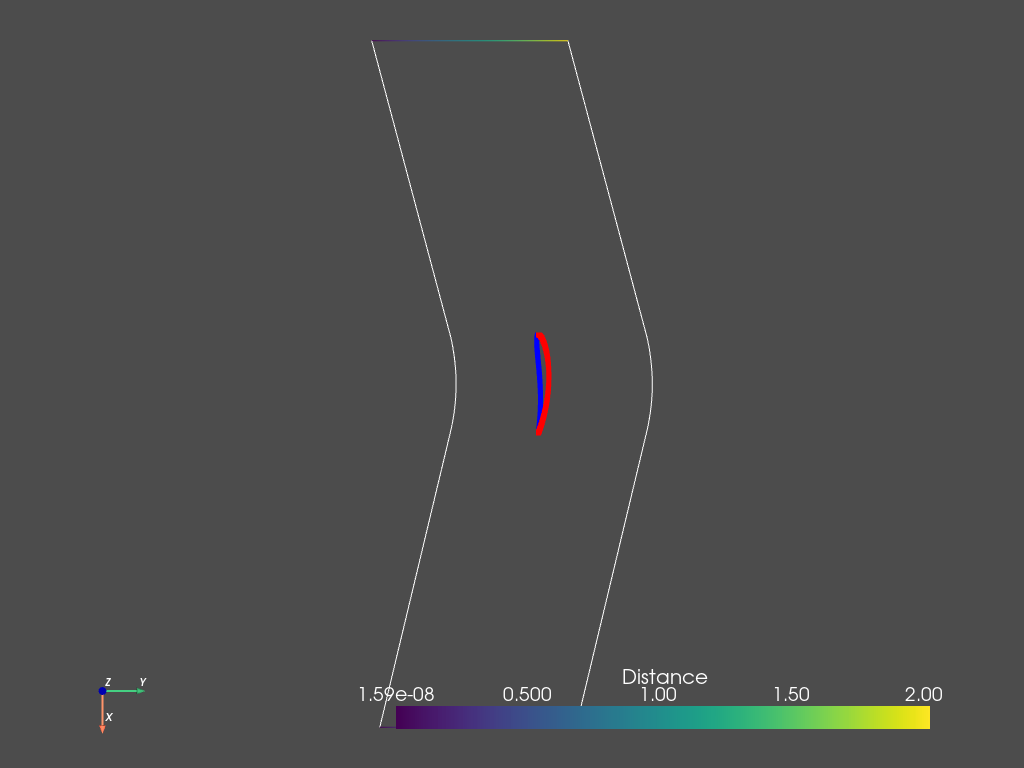

In [6]:
domain2d = CascadeDomain2D()
domain2d.from_cascade_parameters(domainparas)
domain2d.plot()
